# LLC4320 SST

In [1]:
from dask_gateway import GatewayCluster

cluster = GatewayCluster()
cluster.scale(30)
#cluster.adapt(minimum=2, maximum=10)  # or cluster.scale(n) to a fixed size.
client = cluster.get_client()

In [12]:
client.restart()

Client Scheduler: gateway://traefik-gcp-uscentral1b-staging-dask-gateway.staging:80/staging.101353d99d95436ba949ba87da388a45 Dashboard: /services/dask-gateway/clusters/staging.101353d99d95436ba949ba87da388a45/status,Cluster Workers: 30 Cores: 60 Memory: 240.00 GiB


In [ ]:
client.close()
cluster.close()

In [ ]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import fsspec

In [4]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")
ds  = cat["LLC4320_SST"].to_dask()

In [5]:
sst = ds.SST[0].load()

In [42]:
sst.shape

(13, 4320, 4320)

In [47]:
sst[0,:,:]

<xarray.DataArray 'SST' (j: 4320, i: 4320)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 0.27788144,  0.30080017,  0.3186074 , ..., -1.5628352 ,
        -1.594186  , -1.558726  ],
       [ 0.22379693,  0.25919893,  0.28743258, ..., -1.566899  ,
        -1.6239544 , -1.6306869 ],
       [ 0.14672454,  0.19607492,  0.23751684, ..., -1.5858804 ,
        -1.6204052 , -1.6362863 ]], dtype=float32)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
    time     datetime64[ns] 2011-09-13

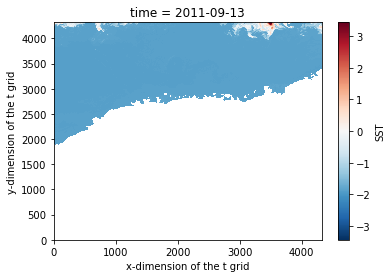

In [53]:
sst[0,:,:].plot()

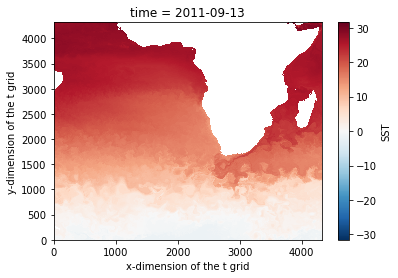

In [54]:
sst[1,:,:].plot();

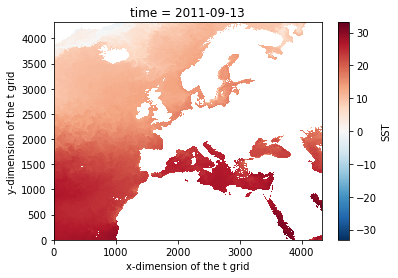

In [55]:
sst[2,:,:].plot();

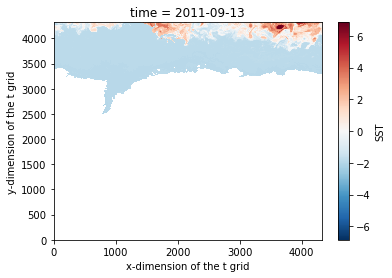

In [56]:
sst[3,:,:].plot();

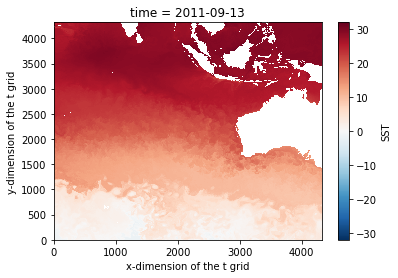

In [57]:
sst[4,:,:].plot();

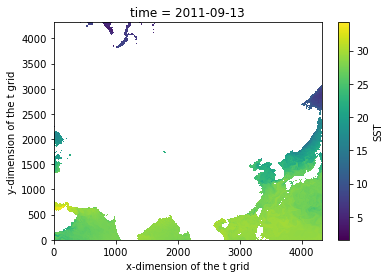

In [58]:
sst[5,:,:].plot();

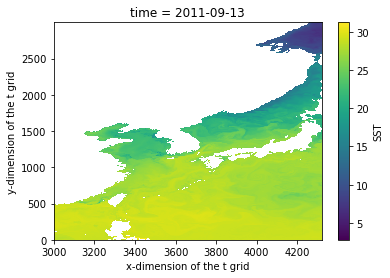

In [60]:
sst[5,:3000,3000:].plot();

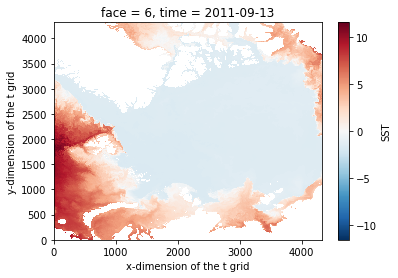

In [13]:
sst[6,:,:].plot();

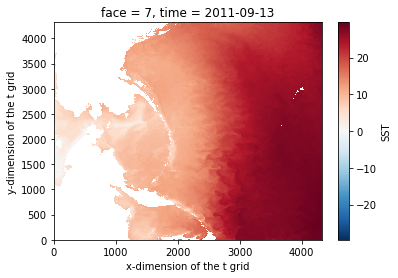

In [14]:
sst[7,:,:].plot();

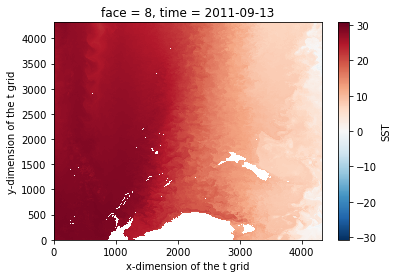

In [15]:
sst[8,:,:].plot();

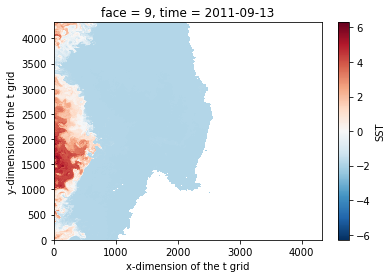

In [16]:
sst[9,:,:].plot();

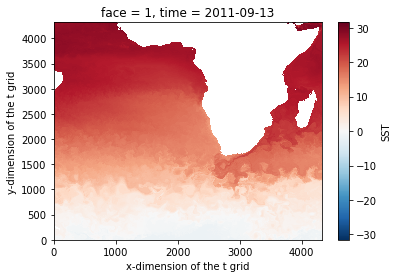

In [17]:
sst[1,:,:].plot();

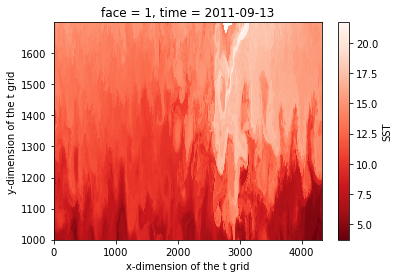

In [30]:
sst[1,1000:1700,:].plot(cmap='Reds_r');

In [32]:
agulhas = sst[1,1000:1700,:].load()
x_a = sst.i.load()
y_a = sst.j[1000:1700].load()

In [8]:
kuroshio = sst[5,:3000,3000:].load()
x = sst.i[3000:].load()
y = sst.j[:3000].load()

In [67]:
sst.i[3000:]

<xarray.DataArray 'i' (i: 1320)>
array([3000, 3001, 3002, ..., 4317, 4318, 4319])
Coordinates:
  * i        (i) int64 3000 3001 3002 3003 3004 ... 4315 4316 4317 4318 4319
    time     datetime64[ns] 2011-09-13
Attributes:
    axis:           X
    long_name:      x-dimension of the t grid
    standard_name:  x_grid_index
    swap_dim:       XC

In [68]:
sst.i[-1]

<xarray.DataArray 'i' ()>
array(4319)
Coordinates:
    i        int64 4319
    time     datetime64[ns] 2011-09-13
Attributes:
    axis:           X
    long_name:      x-dimension of the t grid
    standard_name:  x_grid_index
    swap_dim:       XC

(array([37103763., 13232595., 12515448., 12643747., 10446474.,  9366203.,
        10143138., 16241165., 18797058.,   148375.]),
 array([-2.862177 ,  0.8477427,  4.557662 ,  8.267582 , 11.977501 ,
        15.687421 , 19.39734  , 23.10726  , 26.817179 , 30.5271   ,
        34.23702  ], dtype=float32),
 <BarContainer object of 10 artists>)

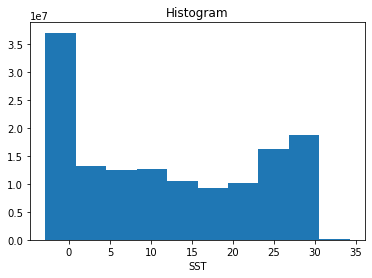

In [34]:
plt.plot()

In [9]:
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

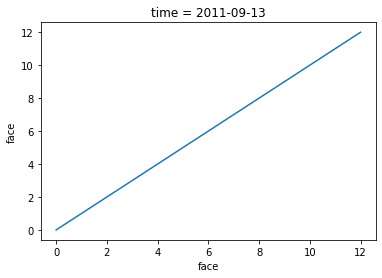

In [41]:
sst.face.plot()

<ipython-input-10-a5e49b33f0f5>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, kuroshio)


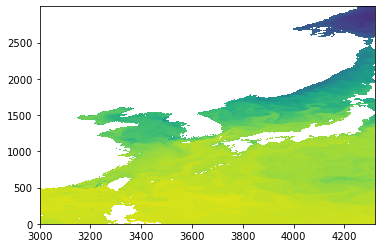

In [10]:
plt.pcolormesh(x, y, kuroshio)

<ipython-input-37-68c8ab236c6b>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_a, y_a, agulhas, cmap='Reds_r', vmax=50)


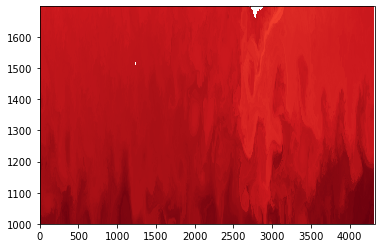

In [37]:
plt.pcolormesh(x_a, y_a, agulhas, cmap='Reds_r', vmax=50)

In [ ]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=proj))

ax.set_extent([3000, 4319, 0, 3000], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))

im = ax.pcolormesh(x_a, y_a, agulhas, transform=ccrs.PlateCarree(), cmap='Reds_r', vmax=30)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("Sea Surface Temperature [˚C]", labelpad=12, fontsize=13)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

ax.text(-0.1, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)

plt.title('SST of Gulf Stream from MUR satellite data', fontsize=12);

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
Exception in callback None()
handle: <Handle cancelled>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/site-packages/tornado/iostream.py", line 1391, in _do_ssl_handshake
    self.socket.do_handshake()
  File "/srv/conda/envs/notebook/lib/python3.8/ssl.py", line 1309, in do_handshake
    self._sslobj.do_handshake()
ssl.SSLCertVerificationError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1125)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "/srv/conda/envs/notebook/lib/p

KeyboardInterrupt: 